# Spike Train Analysis: From Single Neuron to Multi-Electrode Array

## Introduction

In this notebook, we'll explore two fascinating datasets that provide insights into neuronal activity at different scales. We'll start with a single neuron's response to varying light intensities and then move on to a multi-electrode array recording from multiple neurons.

## Part 1: Single Neuron Response to Varying Light Intensities

### Dataset Description

The `ten_intensities` dataset expands on the optogenetic spike train data we worked with previously. This dataset contains recordings from a single neuron as it was stimulated with ten different intensities of light (550 nm green) that activate its receptors. 

Key features of the dataset:
- 10 different light intensities
- 10 trials for each intensity (100 trials total)
- Each trial lasts 20 ms
- Optical stimulation starts at 4 ms and ends at 14 ms

The purpose of measuring the neuron's response across a range of intensities is to map out the response "profile" of the neuron in terms of the number of spikes elicited by differing intensities.

### Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/ten_intensities.csv')

# Take a look at the first few rows of the data
print(data.head())

# Get the shape of the data
print(data.shape)

# Get the column names
print(data.columns)

# Get the data types of each column
print(data.dtypes)

# Calculate summary statistics for the data
print(data.describe())

   Intensity  Trial  SpikeTime
0          0      1         14
1          0      1         18
2          0      3         14
3          0      3         20
4          0      4         14
(231, 3)
Index(['Intensity', 'Trial', 'SpikeTime'], dtype='object')
Intensity    int64
Trial        int64
SpikeTime    int64
dtype: object
        Intensity       Trial   SpikeTime
count  231.000000  231.000000  231.000000
mean     6.285714    4.441558   12.969697
std      2.313611    2.910970    4.501588
min      0.000000    0.000000    0.000000
25%      5.000000    2.000000   10.000000
50%      7.000000    4.000000   13.000000
75%      8.000000    7.000000   17.000000
max      9.000000    9.000000   20.000000


### Data Visualization

Let's visualize the data to better understand the neuron's response patterns.

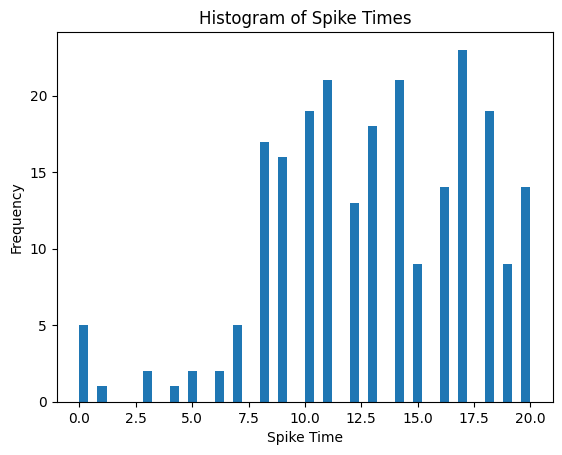

In [2]:
# Plot a histogram of the SpikeTime column
plt.hist(data['SpikeTime'], bins=50)
plt.xlabel('Spike Time')
plt.ylabel('Frequency')
plt.title('Histogram of Spike Times')
plt.show()


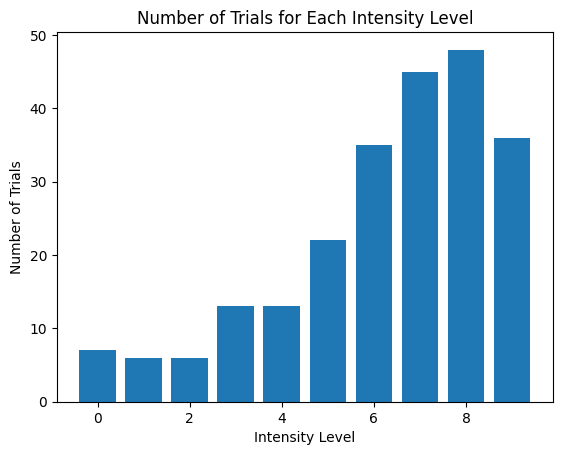

In [3]:
# Plot a bar chart of the number of trials for each intensity level
intensity_counts = data['Intensity'].value_counts()
plt.bar(intensity_counts.index, intensity_counts.values)
plt.xlabel('Intensity Level')
plt.ylabel('Number of Trials')
plt.title('Number of Trials for Each Intensity Level')
plt.show()

### Raster Plots and PSTHs

Now, let's create raster plots and peri-stimulus time histograms (PSTHs) for each intensity level.


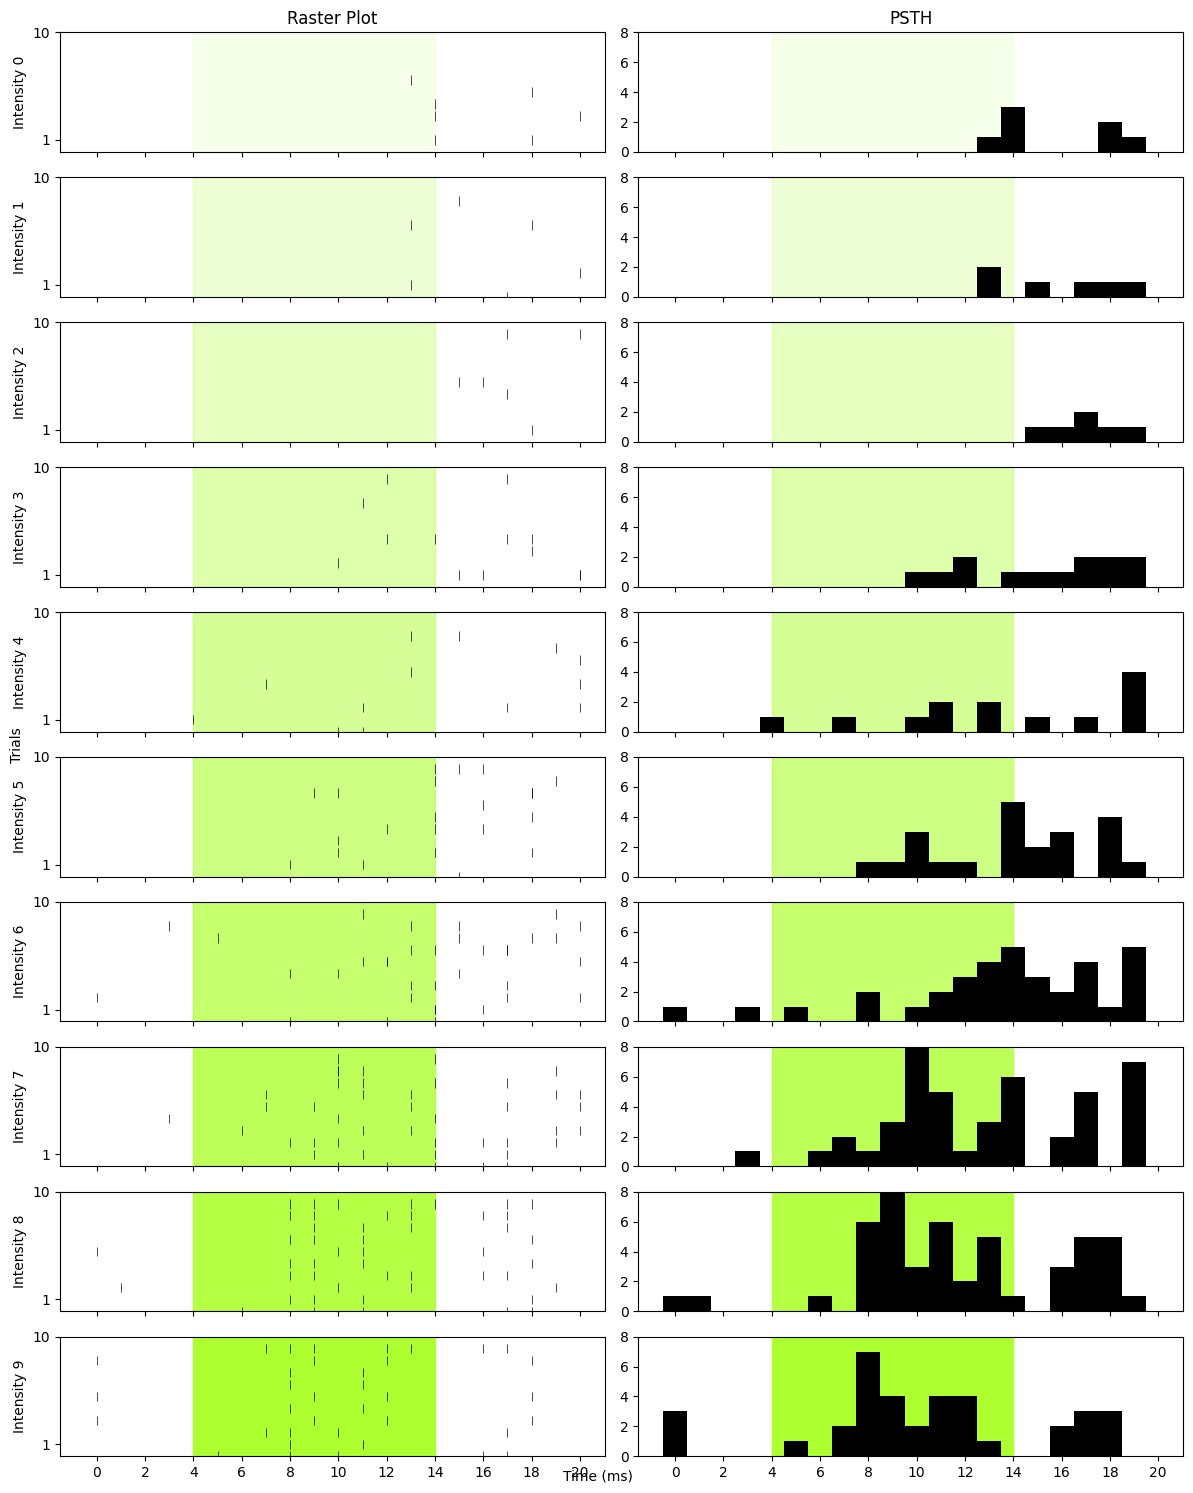

In [4]:
# Define constants
stim_on = 4
stim_off = 14
num_tp = 21
trials = sorted(data['Trial'].unique())

# Create a list of intensity levels and sort them
int_levels = sorted(data['Intensity'].unique())

# Set the number of subplot rows based on number of intensity levels in data
# Also specify the figure dimensions since it will need to be a big figure
fig, axs = plt.subplots(len(int_levels), 2, figsize=[12, 15], sharex=True)

# Initialize y_max to scale the PSTHs
y_max = 0

for i, intensity in enumerate(int_levels):
    
    ## Raster plot
    # select just data for current intensity level
    dat = data[data['Intensity'] == intensity]

    # Draw the raster one trial at a time
    for trial in trials:
        # get spike times for this trial
        spike_times = dat[dat['Trial'] == trial]['SpikeTime']
        # Draw the raster
        axs[i, 0].vlines(spike_times, 
                         trial - 0.4, trial + 0.4, 
                         color='black', linewidth=0.5)

    # Shade time when stimulus was on
    axs[i, 0].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')

    # Set y-axis limits and ticks for raster plot
    axs[i, 0].set_ylim(0, len(trials))
    axs[i, 0].set_yticks([1, len(trials)])
    axs[i, 0].set_ylabel(f'Intensity {intensity}')

    ## PSTH
    # Shade time when stimulus was on
    axs[i, 1].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')
    
    # Plot histogram
    hist, bins = np.histogram(dat['SpikeTime'], bins=range(0, num_tp, 1))
    axs[i, 1].bar(bins[:-1], hist, width=1, color='black')

    # Update y_max
    y_max = max(y_max, np.max(hist))

    # Set x-axis ticks for PSTH
    axs[i, 1].set_xticks(range(0, num_tp, 2))
    axs[i, 1].set_xlabel('')

# Set y-axis limits for all PSTHs
for i in range(len(int_levels)):
    axs[i, 1].set_ylim(0, y_max)

# Set titles and labels
axs[0, 0].set_title('Raster Plot')
axs[0, 1].set_title('PSTH')
fig.text(0.5, 0.01, 'Time (ms)', ha='center')
fig.text(0.01, 0.5, 'Trials', va='center', rotation='vertical')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

### Heat Map of Spike Probability

Finally, let's create a heat map to visualize the spike probability across different intensities and time points.

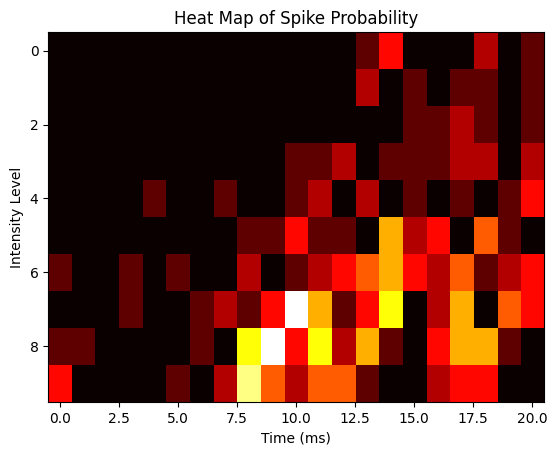

In [5]:
# Define experimental parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities

# Initialize 2D array to store histograms
histograms = np.zeros((num_intensities, num_tp))

# Loop through each intensity level and compute histogram
for i, intensity in enumerate(sorted(data['Intensity'].unique())):
    hist, _ = np.histogram(data[data['Intensity'] == intensity]['SpikeTime'],
                           bins=num_tp,
                           range=(0, num_tp))
    histograms[i, :] = hist

# Create heat map
plt.imshow(histograms, cmap='hot', interpolation='nearest', aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity Level')
plt.title('Heat Map of Spike Probability')
plt.show()

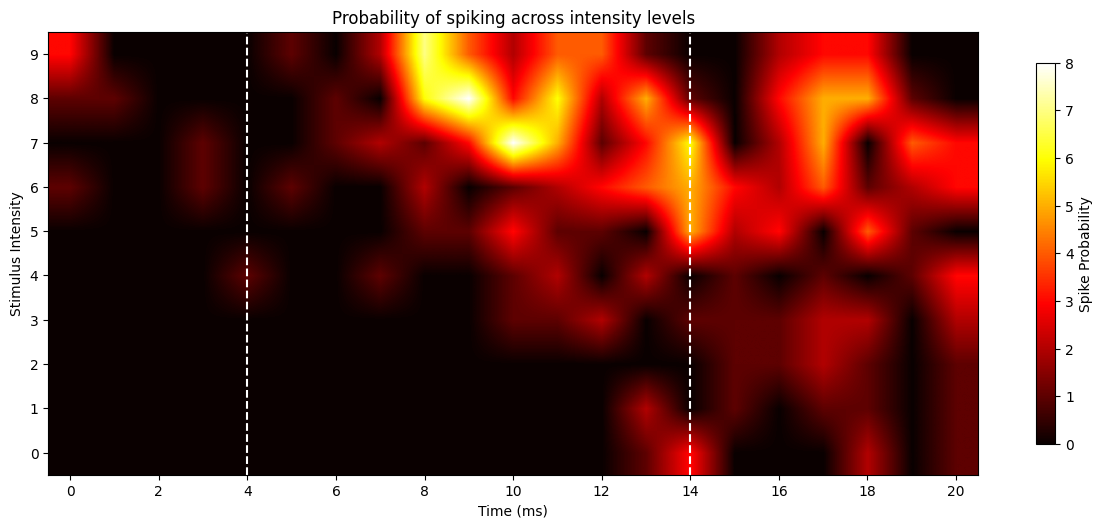

In [6]:
# Define experimental parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities

# Initialize 2D array to store histograms
histograms = np.zeros((num_intensities, num_tp))

# Loop through each intensity level and compute histogram
for i, intensity in enumerate(sorted(data['Intensity'].unique())):
    hist, _ = np.histogram(data[data['Intensity'] == intensity]['SpikeTime'],
                           bins=num_tp,
                           range=(0, num_tp))
    histograms[i, :] = hist

# Create heat map
fig, ax = plt.subplots(figsize=[15, 15])
im = ax.imshow(histograms, 
               origin='lower', 
               cmap='hot', 
               interpolation='bilinear')

# Show stimulus on and off times
ax.axvline(stim_on, color='white', linestyle='--')
ax.axvline(stim_off, color='white', linestyle='--')

# Set tick mark range and spacing
ax.set_xticks(range(0, num_tp + 1, 2))
ax.set_xlabel('Time (ms)')

ax.set_yticks(range(num_intensities))
ax.set_ylabel('Stimulus Intensity')

ax.set_title('Probability of spiking across intensity levels')

# Create a colorbar using the im pointer
cb = fig.colorbar(im, shrink=0.33)
cb.ax.set_ylabel('Spike Probability')

plt.show()

In [7]:
# times the stimulus went on and off
trial_start_time = -0.150
grating_on_time  = 0.0
grating_off_time = 2.0
trial_end_time   = 2.5

## Part 2: Multi-Electrode Array Recordings

### Dataset Description

This dataset comes from a study by Snyder, Morais, Willis, and Smith (2015). The researchers aimed to relate neural activity across different scales, from single units (individual neurons) to whole-brain networks. 

Key features of the dataset:
- Recordings from a 96-electrode array implanted in a rhesus macaque monkey's brain
- Simultaneous EEG recordings (not included in this analysis)
- Focus on spike count correlation, a measure of neural functional connectivity

Functional connectivity is of widespread interest in neuroscience as it refers to correlations in activity between different brain areas. If different brain areas (or individual neurons) show correlated activity, it likely indicates that they work together in some capacity. This is particularly significant if their functional connectivity changes as a result of experimental manipulations.

### Data Loading and Exploration

In [8]:
#load the MEA dataset
df = pd.read_csv('data/multielectrode_data.csv')
print(df.shape)
df.head()

(623406, 4)


,channel,time,orientation,trial
0,42.0,2.425,90.0,0.0
1,42.0,2.452,90.0,0.0
2,42.0,2.483,90.0,0.0
3,42.0,2.515,90.0,0.0
4,42.0,2.545,90.0,0.0


The columns are:
channel — which electrode the data came from
time — spike time, relative to stimulus onset (so we have negative values for spikes that occurred during the fixation period prior to stimulus onset). This is measured in seconds
orientation — of stimulus (0 or 90 deg)
trial number — 1150 trials for each orientation

In [9]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of electrodes:", len(df['channel'].unique()))
print("Number of orientations:", len(df['orientation'].unique()))
print("Number of trials:", len(df['trial'].unique()))

Number of rows: 623406
Number of columns: 4
Number of electrodes: 20
Number of orientations: 2
Number of trials: 2300


Electrodes

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(electrode_pivot, cmap='Blues', annot=True, fmt='.2f', 
            linewidths=0.5, linecolor='white')
plt.title('Electrode Activity Heatmap')
plt.xlabel('')
plt.ylabel('Electrode')
plt.show()

NameError: name 'electrode_pivot' is not defined

<Figure size 1200x1000 with 0 Axes>

Orientation-Selective Responses
Let's examine the orientation-selective responses of each electrode:

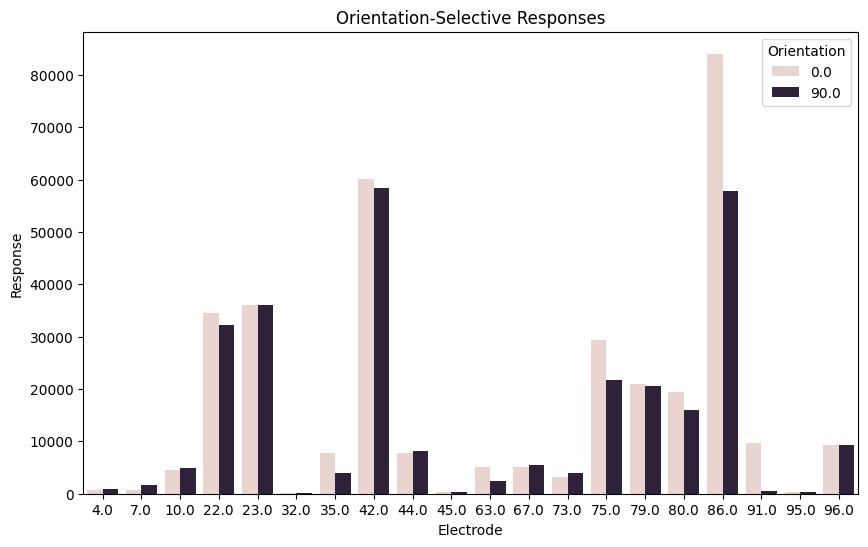

In [15]:
# Create a bar plot of orientation-selective responses
orientation_responses = df.groupby(['channel', 'orientation'])['time'].count().reset_index()
orientation_responses.columns = ['Electrode', 'Orientation', 'Response']
plt.figure(figsize=(10, 6))
sns.barplot(x='Electrode', y='Response', hue='Orientation', data=orientation_responses)
plt.title('Orientation-Selective Responses')
plt.xlabel('Electrode')
plt.ylabel('Response')
plt.legend(title='Orientation')
plt.show()

C:\Users\kaoss\AppData\Local\Temp\ipykernel_11084\840684204.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


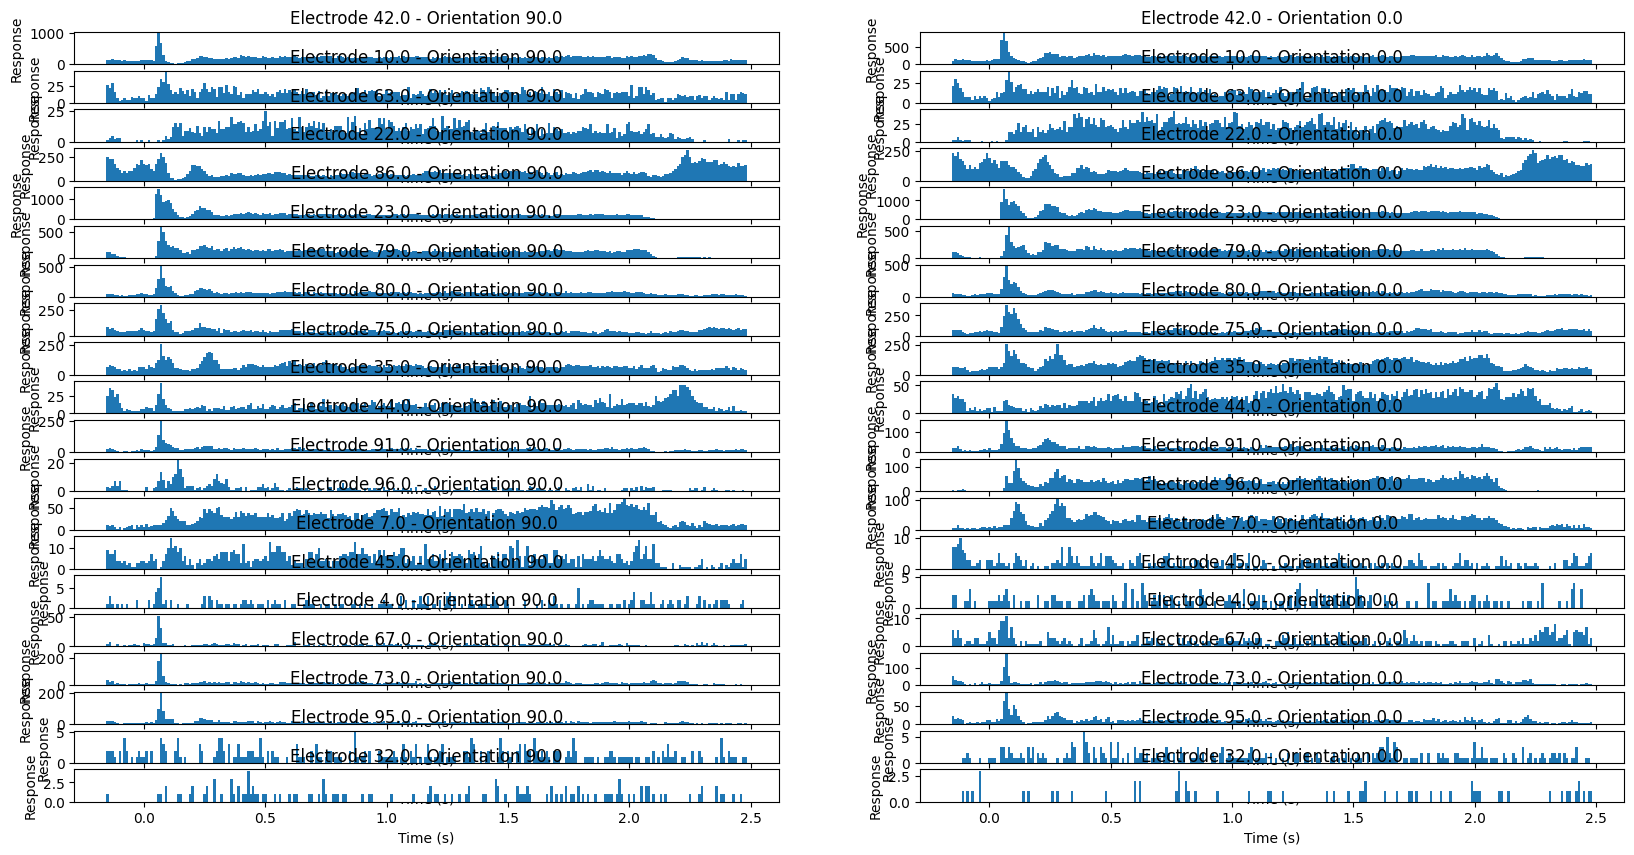

In [17]:
# Create PSTHs for each electrode and orientation
fig, axs = plt.subplots(len(df['channel'].unique()), len(df['orientation'].unique()), figsize=(20, 10))

for i, electrode in enumerate(df['channel'].unique()):
    for j, orientation in enumerate(df['orientation'].unique()):
        dat = df[(df['channel'] == electrode) & (df['orientation'] == orientation)]
        time_bins = np.arange(trial_start_time, trial_end_time, 0.01)
        hist, bins = np.histogram(dat['time'], bins=time_bins)
        axs[i, j].bar(bins[:-1], hist, width=0.01)
        axs[i, j].set_title(f'Electrode {electrode} - Orientation {orientation}')
        axs[i, j].set_xlabel('Time (s)')
        axs[i, j].set_ylabel('Response')

plt.tight_layout()
plt.show()

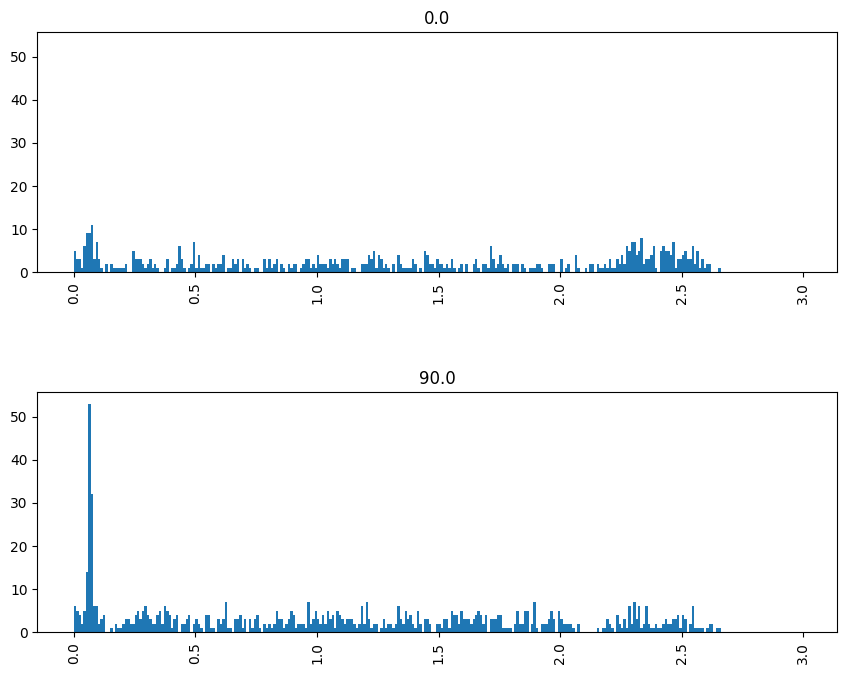

In [24]:
# Create a set of 10 ms bins for our PSTHs, spanning the time range of each trial
trial_start_time = 0  # assuming the trial starts at 0 seconds
trial_end_time = 3  # assuming the trial ends at 3 seconds
time_bins = np.arange(trial_start_time, trial_end_time, 0.01)

# Extract the data for one channel, #4
dat = df[(df['channel'] == 4)]

# Plot the PSTH
fig, axs = plt.subplots(2, 1, figsize=[10, 8], sharey=True)

dat.hist(column='time', by='orientation', bins=time_bins, ax=axs)

plt.show()

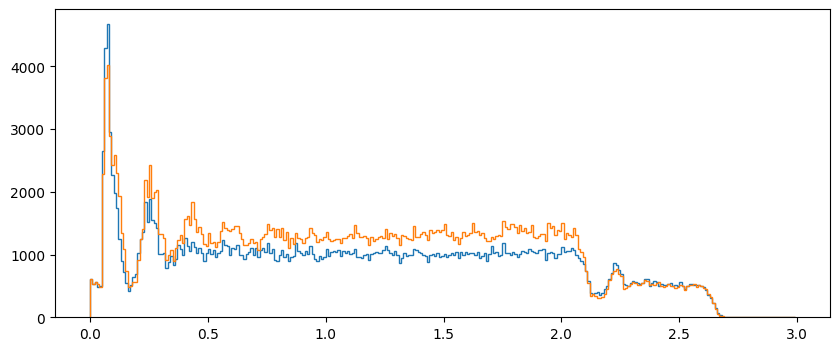

In [25]:
# Plot both orientations overlaid
fig, axs = plt.subplots(figsize=[10, 4], sharey=True)

for idx, ori in enumerate(df['orientation'].unique()):
    axs.hist(df[df['orientation'] == ori]['time'], bins=time_bins, histtype='step')

plt.show()

Plotting the Histograms

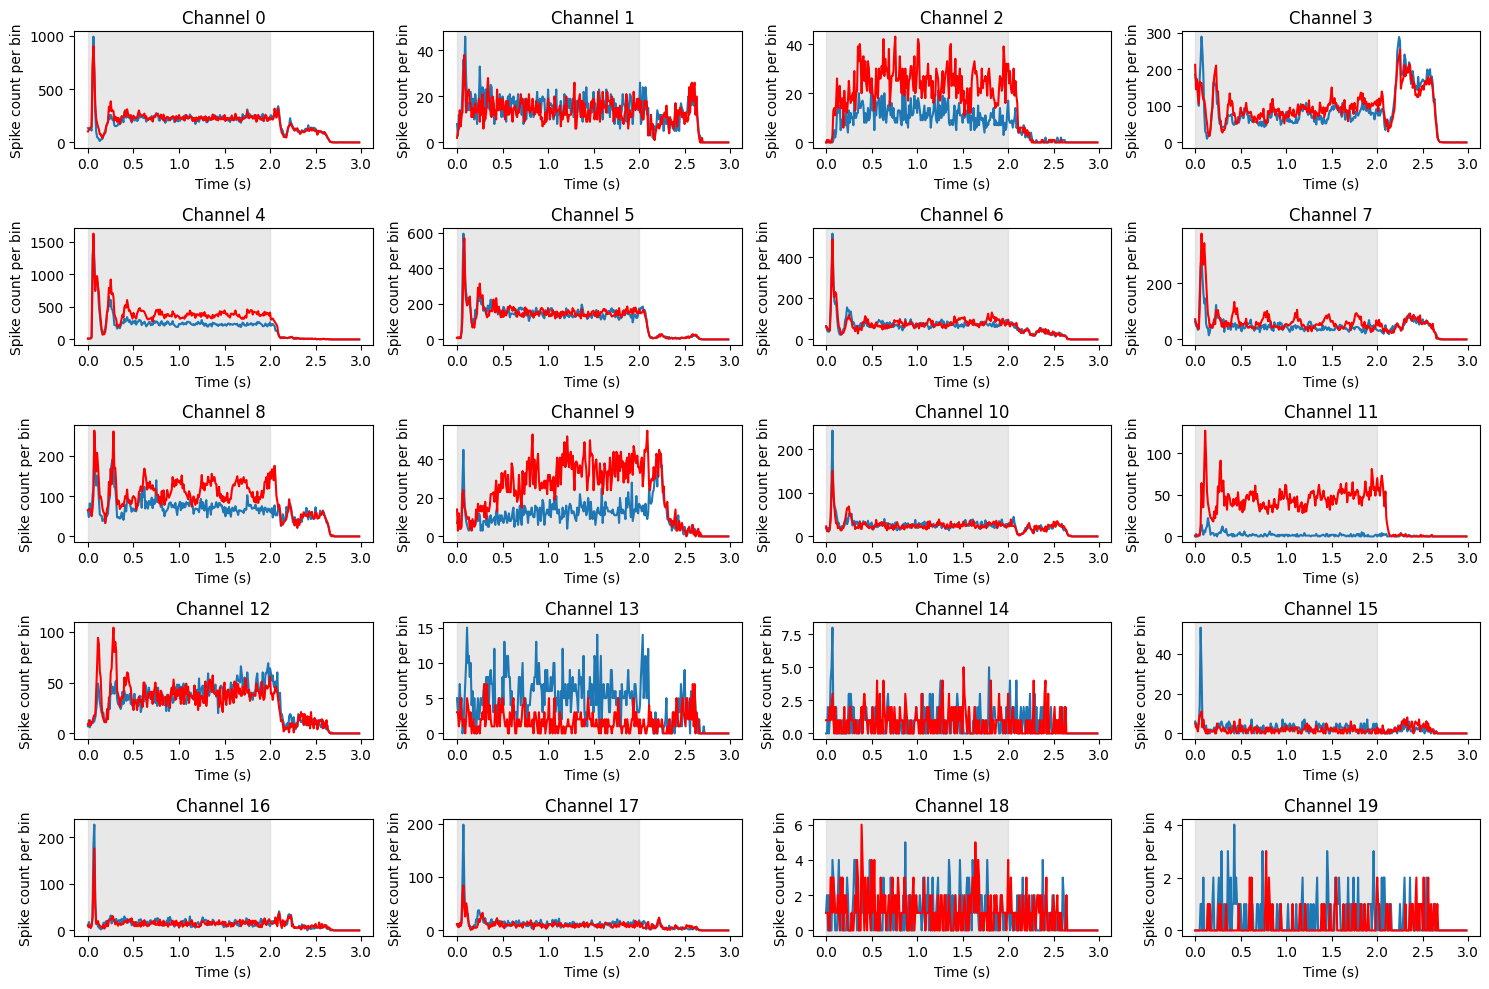

In [36]:
# Define the number of channels and orientations
num_chan = len(df['channel'].unique())
num_ortns = len(df['orientation'].unique())

# Create a NumPy array of histograms
hist_arr = np.zeros([num_chan * num_ortns, len(time_bins)-1])

# Initialize r_idx
r_idx = 0

for chan in df['channel'].unique():
    for ori in df['orientation'].unique():
        hist_arr[r_idx], bins = np.histogram(df[(df['channel']==chan) & (df['orientation']==ori)]['time'], bins=time_bins)
        r_idx += 1  # increment r_idx

# Convert to pandas DataFrame with time values as column labels
df_psth = pd.DataFrame(hist_arr, columns=np.round(time_bins[:-1], 3))

condition_labels = pd.DataFrame([[chan, ori] for chan in df['channel'].unique() for ori in df['orientation'].unique()], columns=['channel', 'orientation'])

# Add labels to histograms DataFrame by concatenating
df_psth = pd.concat([condition_labels, df_psth], axis=1)

# Now you can plot the data
fig, axs = plt.subplots(5, 4, figsize=[15, 10])

for chan, ax in enumerate(axs.reshape(-1)):
    chan_val = df['channel'].unique()[chan]
    ori_val1 = df['orientation'].unique()[0]
    ori_val2 = df['orientation'].unique()[1]
    
    ax.plot(time_bins[:-1], df_psth.loc[(df_psth['channel'] == chan_val) & (df_psth['orientation'] == ori_val1)].values[0, 2:])
    ax.plot(time_bins[:-1], df_psth.loc[(df_psth['channel'] == chan_val) & (df_psth['orientation'] == ori_val2)].values[0, 2:], color='red')
    ax.axvspan(grating_on_time, grating_off_time, alpha=0.5, color='lightgray')
    ax.set_title('Channel ' + str(chan))
    ax.set_ylabel('Spike count per bin')
    ax.set_xlabel('Time (s)')

plt.tight_layout()
plt.show()